# Problem Set 2

# Exercise 1: Do Microfinance Loans Affect Expenditure?

Most of the world's poor have limited access to formal credit. Traditionally, they have had to resort to their social networks (family, friends) or local moneylenders that charge exorbitant interest rates (upwardsof 100%). This often prevents individuals from making investments in potential businesses or productive assets. In the last 15 years, microfinance institutions (MFI) have emerged all across the developing world to address this problem. The basic model of a microfinance institution (such as the Grameen Bank) is to provide small loans to a group of potential borrowers at much lower interest rates. The number of very poor families with a microloan has grown exponentially: from 7.6 million in 1997 to 137.5 million in 2010. Micro-credit has been heralded as a major advance in the reduction of global poverty. However, in recent years, critiques have emerged accusing micro-finance institutions of acting irresponsibly by holding the poor to very strict repayment schedules and charging unreasonably high interest rates. So where does this leave us? Does micro-credit help or hinder? In the January 2015 issue of the American Economic Journal: Applied Economics, six papers evaluating the merits of micro-credit were released. We will explore the results from one of these papers by Augsburg et al., which evaluates a microfinance institution in Bosnia and Herzegovina.

## Data Description
The data for this exercise comes from a study conducted in Bosnia and Herzegovina investigating the effects of a small loan on access to liquidity, self-employment, income, labor supply, expenditure, and savings. These were individual-liability loans with monthly repayments and an interest rate of 22%. The sample consists of potential borrowers (who were just marginally eligible for loans). Approximately half the sample was randomly selected to receive the loan (the treatment group), while the other half did not receive anything (control group). You have a subsample of individuals (both in the treatment and control group) that the researchers used for their analysis. The respondent (= the loan applicant) answered questions about the household they belonged to as well as about their loand and personal outcomes (no two respondents are from the same household). The PS2_MFI.dta file includes the following variables (along with some others we will not ask you to analyze):

• `treatment` : dummy equal to 1 if the respondent is in the treatment group (which received a loan)

• `resp_female`: dummy equal to 1 if the respondent is female

• `resp_age`: the respondent's age

• `hhmem`: number of household members

• `hhmem_adults`: number of adults in household ($\geq$ 14)

• `hhmem_children`: number of children in household (<14)

• `hhmem_elderly`: number of elderly in household (>64)

• `total_exp`: total annual household expenditure in Bosnian Convertible Marka (BAM)

• `food_exp`: annual household expenditure on food in BAM

• `nondur_exp`: annual household expenditure on nondurables (rent, fuel, transport, clothes, insurance...) in BAM

• `dur_exp`: annual household expenditure on durables (education, furniture, vehicle...) in BAM

• `temp_exp`: annual household expenditure on temptation goods (cigarettes, tobacco, alcohol) in BAM

The prevailing exchange rate at the time of the study was approximately US$1 = 1.63 BAM.

## Question 1

Load the dataset `PS2_MFI.dta`. Notice that this is a `.dta` file so you will need to use the `haven` package.

In [1]:
library(haven) 
data <- read_dta('PS2_MFI.dta') 
head(data)

intervid,treatment,resp_female,resp_primary,resp_secondary,resp_tertiary,resp_noschool,resp_age,resp_married,resp_emp,⋯,hhmem_unemployed,hhmem_retired,hhmem_school,total_exp,food_exp,nondur_exp,dur_exp,temp_exp,savings_avg,followup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1,1,1,0,0,0,29,0,0,⋯,1,0,2,5740,2080,960,1400,1300,0,1
4,0,0,0,0,1,0,49,0,0,⋯,2,0,2,34678,30160,4488,30,0,500,1
6,0,0,1,0,0,0,24,1,1,⋯,0,0,0,9180,2600,420,4340,1820,0,1
7,0,0,0,1,0,0,45,0,1,⋯,0,0,0,12696,9360,1812,900,624,0,1
8,1,0,1,0,0,0,52,0,1,⋯,0,0,2,2960,2600,360,0,0,0,1
13,1,0,0,1,0,0,18,1,1,⋯,0,0,1,9188,7800,360,300,728,500,1


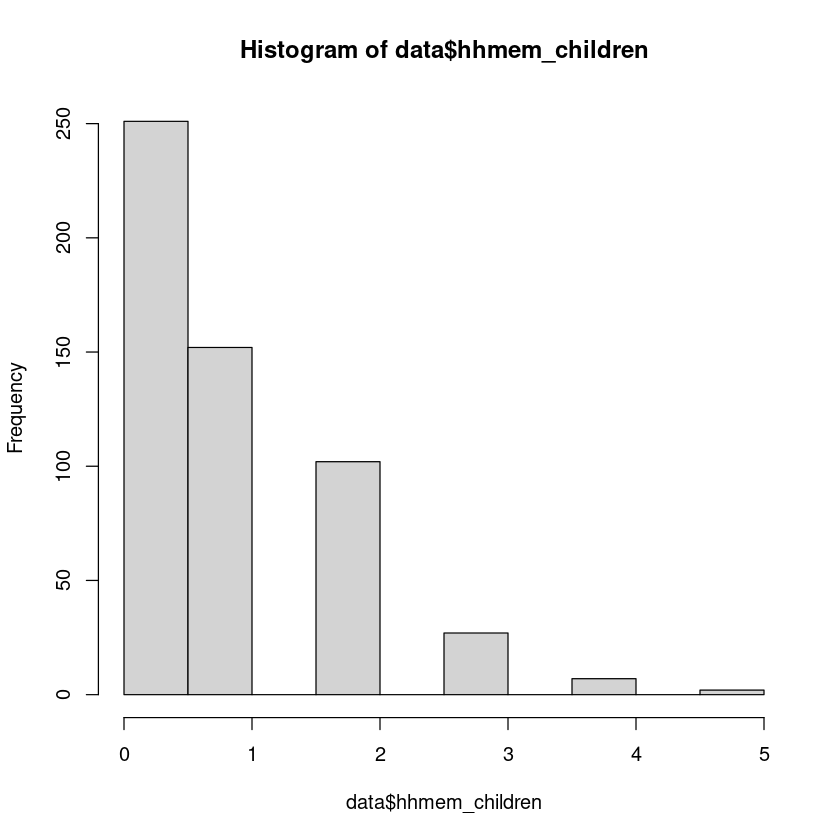

In [18]:
hist(data$hhmem_children)

### a) How many respondents are in your data set? How many respondents are unmarried? What is the mean age among the respondents in the sample? What is the mean number of children in respondents' households in your sample?
Note there are some missing values of respondents' age. What argument do you have to add to `mean()` to get around this?

Hint: check for the `mean()` syntax in this website: https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/mean .

In [15]:
respondents <- nrow(data)
respondents 
unmarried <- sum(data$resp_married)
unmarried
mean_age <- (data$resp_age)
mean(mean_age, na.rm=TRUE)
number_child <- (data$hhmem_children)
mean(number_child)

[1] 541

[1] 118

[1] 37.47963

[1] 0.8780037

### b) Construct a variable `total_exp_pc` equal to total expenditures per capita in BAM. Plot a histogram (Hint: use the `hist()` command) of this constructed variable. What is the range of household total expenditures per capita? (You may want to refer to US Dollars in the discussion, so as to make sense of the income level of these MFI clients).

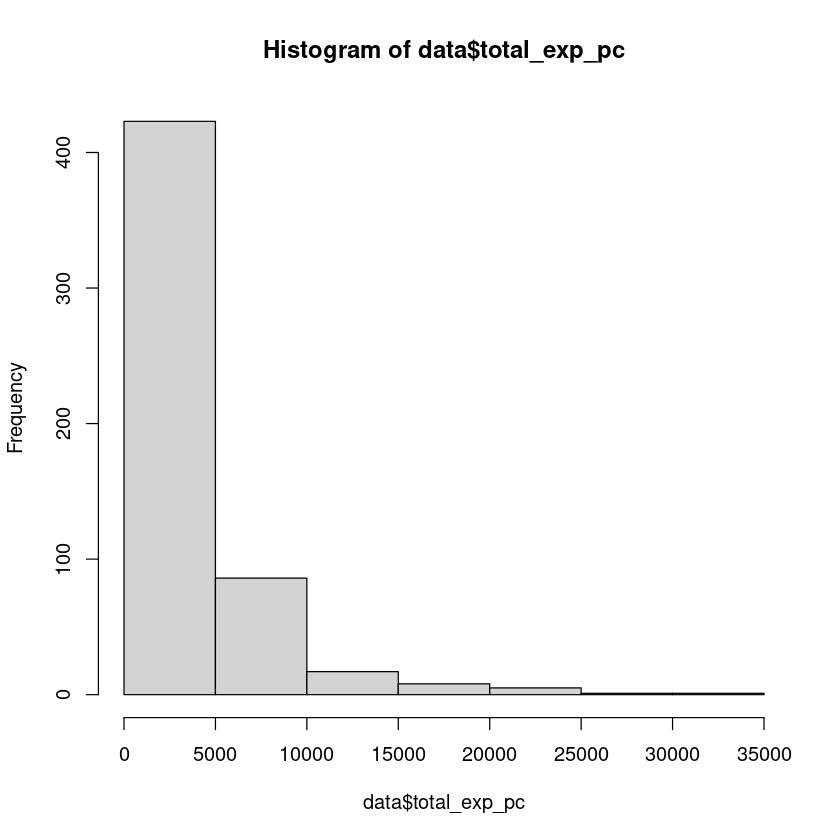

In [20]:
library(tidyverse)
data <- data %>% mutate(total_exp_pc = total_exp/data$hhmem)
hist(data$total_exp_pc)

In [ ]:
This shows us that on average, they are spending less than 5000 dollars yearly per person.

### c) Calculate the proportion of household expenditures spent on "temptation" goods (cigarettes, alcohol, etc.). You will need to create this new variable. What is the mean? What is the median? Compare the mean value of these proportions among treatment and control households. Print the mean for each group, as well as the difference in means between treatment and control households.

In [ ]:
#First get the proportion of overall --> Than the mean of treatment vs control households. Difference between those two.

In [5]:
data <- data %>% mutate(temptation = temp_exp/total_exp)
mean(data$temptation)
median(data$temptation)

[1] 0.07282481

[1] 0.05420902

In [41]:
treatement_group <- data[data$treatment == "1",]
controlled_group <- data[data$treatment == "0",]

mean_treatment <- mean(treatement_group$temptation)
median_treatment <- median(treatement_group$temptation)
mean_controlled <- mean(controlled_group$temptation)
median_controlled <- median(controlled_group$temptation)

sprintf("Mean treatment : %f", mean_treatment)
sprintf("Median Treatment : %f", median_treatment)
sprintf("Mean controlled : %f", mean_controlled)
sprintf("Median controlled : %f", median_controlled)


difference <- mean_treatment - mean_controlled
sprintf("Difference : %f", difference)

[1] "Mean treatment : 0.069910"

[1] "Median Treatment : 0.051661"

[1] "Mean controlled : 0.076454"

[1] "Median controlled : 0.055954"

[1] "Difference : -0.006544"

the difference is -0.0064, this is telling us control spends more on temptation then treatment group.

## Question 2

We will now explore the role of household size in food consumption. Consider these two models: 

Model (1): $\ln($food_exp_pc$) = \beta_0 + \beta_1 \ln($nondur_exp_pc$) + \beta_2 treatment+ u$

Model (2): $\ln($food_exp_pc$) = \beta_0 + \beta_1 \ln($nondur_exp_pc$) + \beta_2 treatment + \beta_3 \ln(hhmem) + u$

### a) Estimate equations (1) and (2). Print the regression outputs for both regressions.

In [49]:
data <- data %>% mutate(log_food_exp_pc = log(food_exp))
data <- data %>% mutate(log_nondur_exp_pc = log(nondur_exp))
data <- data %>% mutate(log_hhmem = log(hhmem))
head(data)

slr<-lm(log_food_exp_pc~log_nondur_exp_pc + treatment, data=data)
summary(slr)

slr2<-lm(log_food_exp_pc~log_nondur_exp_pc + treatment + log_hhmem, data=data)
summary(slr2)

intervid,treatment,resp_female,resp_primary,resp_secondary,resp_tertiary,resp_noschool,resp_age,resp_married,resp_emp,⋯,nondur_exp,dur_exp,temp_exp,savings_avg,followup,total_exp_pc,temptation,log_food_exp_pc,log_nondur_exp_pc,log_hhmem
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1,1,1,0,0,0,29,0,0,⋯,960,1400,1300,0,1,1148.0,0.22648084,7.640123,6.866933,1.609438
4,0,0,0,0,1,0,49,0,0,⋯,4488,30,0,500,1,8669.5,0.00000000,10.314272,8.409162,1.386294
6,0,0,1,0,0,0,24,1,1,⋯,420,4340,1820,0,1,9180.0,0.19825708,7.863267,6.040255,0.000000
7,0,0,0,1,0,0,45,0,1,⋯,1812,900,624,0,1,12696.0,0.04914934,9.144201,7.502186,0.000000
8,1,0,1,0,0,0,52,0,1,⋯,360,0,0,0,1,740.0,0.00000000,7.863267,5.886104,1.386294
13,1,0,0,1,0,0,18,1,1,⋯,360,300,728,500,1,1837.6,0.07923378,8.961879,5.886104,1.609438



Call:
lm(formula = log_food_exp_pc ~ log_nondur_exp_pc + treatment, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.08093 -0.42608  0.03439  0.44250  2.34080 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        7.20335    0.18191  39.598  < 2e-16 ***
log_nondur_exp_pc  0.18547    0.02420   7.664 8.45e-14 ***
treatment         -0.08050    0.05631  -1.429    0.153    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6507 on 538 degrees of freedom
Multiple R-squared:  0.1027,	Adjusted R-squared:  0.09935 
F-statistic: 30.78 on 2 and 538 DF,  p-value: 2.198e-13



Call:
lm(formula = log_food_exp_pc ~ log_nondur_exp_pc + treatment + 
    log_hhmem, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.05055 -0.41227  0.02881  0.42868  2.23038 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        7.01344    0.18594  37.718  < 2e-16 ***
log_nondur_exp_pc  0.17711    0.02398   7.387 5.79e-13 ***
treatment         -0.09111    0.05564  -1.637    0.102    
log_hhmem          0.21719    0.05537   3.922 9.91e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6421 on 537 degrees of freedom
Multiple R-squared:  0.1277,	Adjusted R-squared:  0.1228 
F-statistic:  26.2 on 3 and 537 DF,  p-value: 7.904e-16


### b) Interpret each of the estimated parameters of equation (2) - remember to include significance. 

### The results you are finding on the role of household size may a priori seem suprising. Try to think about a scenario where two households of the same size, with the same treatment status and per capita expenditures on nondurable goods, decide to move in together. What does your estimation predict about food consumption per capita?

The estimations prediction for this scenario predicts that

### c) How did your estimate of $\hat{\beta}_1$ change between equation (1) and equation (2)? Without performing any calculations, what information does this give you about the correlation between expenditure per capita on nondurable goods and household size? (Explain your reasoning in no more than 4 sentences.)

### d) Predict the expected value of food expenditure per capita of a treatment household with 3 members and per capita expenditures on nondurable goods of BAM 1000 using your estimates from equation (2).

## Question 3

A country's dependency ratio is the ratio of old and young dependents (dependents are those not in the labor force) to the working-age population. A similar measure could be constructed for the household: 

$hhdr =\frac{\text{hh members under 14 or over 64}} {\text{hh members aged 14 to 64}}$ 

Model 2 (as well as Model 1) does not capture how the composition of a household, i.e. the characteristics of the members, is associated with food consumption per capita. You suspect that the structure of the family affects food expenditure per capita controlling for the log of household size and the log of expenditure per capita on nondurable goods (think about how children and older people might consume less food than adults; and how larger households might have more children). Specifically you hypothesize that a higher dependency ratio is associated with lower food expenditure per capita, holding other factors constant. 

### (a) Write an equation you could estimate that would allow you to test this hypothesis.

### (b) Estimate the equation in part (a). Print the regression output. What can you conclude about the hypothesis? 
Note that some households don't have members aged 14 to 64, which means that their $hhdr$ would be undefined. Replace $hhdr$ with NA for these observations. 

Hint: The following website has some simple examples showing you how to replace variables with conditions in R: https://statisticsglobe.com/replace-values-in-data-frame-conditionally-in-r .

# Exercise 2: Perceptions of Global Warming

Gallup Polling collects information about a variety of topics ( health, environment, political attitudes, education). In March 2018, Gallup conducted a poll to gather information about the perceived onset of global warming among Californian voters. Question: "Do you believe that global warming is caused by human activities?"

|  Group      | Number of Observations  | Yes |
|-------------|-------------------------|-----|
|  All voters |  1408                   | 697 |
| Republicans |  482                    | 133 |  
| Democrats   |  521                    | 375 | 
| Independents|  405                    | 189 |


Consider first the overall result (all voters). Let $p$ be the fraction of all voters in California (the population of interest) that believe that global warming is caused by human activities.

 Note: You answer to the following questions should not necessarily require any R code (unless you would like to use R as a calculator). Some of your answers will require that you type in equations. LaTeX is a typsetting language that makes nicely formatted equations. At the beginning and end of an equation you will need to type a $\$$  to tell Jupyter that you are typing a Latex equation. The following website has some simple examples showing you how to format your equations in Latex:  http://www.personal.ceu.hu/tex/cookbook.html . 

### (a) Use the survey results to estimate $p$ for the whole population. Print $p$.

### (b) Construct a 95% confidence interval for $p$. Interpret.

### (c) Suppose you want to test the null hypothesis that the fraction of voters who believe that global warming is caused by human activities is the same among Democrats and Republicans against the alternative hypothesis that the fraction of voters who believe that global warming is caused by human activities is higher among Democrats than Republicans. Write down the null and alternative hypotheses. Is this a one-sided or two-sided test?

### (d) Generate a test statistic which will allow you to test the hypotheses in part (c), and identify a critical value which will give you 99% confidence. Print the test statistic and the critical value.

### (e) Implement your test and interpret your results.